In [2]:
import datetime as dt
import yfinance as yf
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mpl_finance as mpf

C:\Users\nbwan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


In [3]:
start = dt.datetime(2022,1,1)
end = dt.datetime(2023,8,1)

yf.pdr_override()
stock = input('Enter a stock ticker symbol : ')

data = pdr.get_data_yahoo(stock, start, end)
data.reset_index(inplace=True)
data

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,335.350006,338.000000,329.779999,334.750000,330.092285,28865100
1,2022-01-04,334.829987,335.200012,326.119995,329.010010,324.432129,32674300
2,2022-01-05,325.859985,326.070007,315.980011,316.380005,311.977875,40054300
3,2022-01-06,313.149994,318.700012,311.489990,313.880005,309.512665,39646100
4,2022-01-07,314.149994,316.500000,310.089996,314.040009,309.670441,32720000
...,...,...,...,...,...,...,...
390,2023-07-25,347.109985,351.890015,345.070007,350.980011,350.980011,41637700
391,2023-07-26,341.440002,344.670013,333.109985,337.769989,337.769989,58383700
392,2023-07-27,340.480011,341.329987,329.049988,330.720001,330.720001,39635300
393,2023-07-28,333.670013,340.010010,333.170013,338.369995,338.369995,28484900


In [4]:
data = data[['Date','Open', 'High', 'Low', 'Close']]

data['Date'] = data['Date'].map(mdates.date2num)

C:\Users\nbwan\AppData\Local\Temp\ipykernel_21228\3911683814.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = data['Date'].map(mdates.date2num)


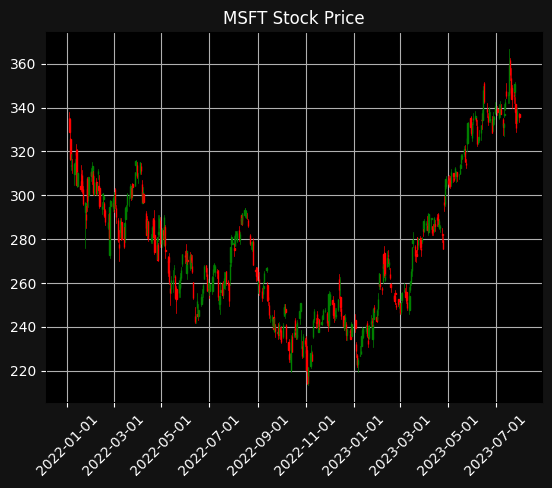

In [7]:
ax = plt.subplot()
ax.grid(True)
ax.set_axisbelow(True)
ax.set_title(f'{stock} Stock Price', color = 'white')
ax.set_facecolor('black')
ax.figure.set_facecolor('#121212')
ax.tick_params(axis= 'x', colors = 'white')
ax.tick_params(axis= 'y', colors = 'white')
ax.xaxis_date()


ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
mpf.candlestick_ohlc(ax, data.values, width=0.5, colorup='g', colordown='r')

plt.show()